In [2]:
library(tidyverse) ; library(ggplot2) ; options(repr.plot.width=5, repr.plot.height=3)

# 12.2 Tidy data

In [3]:
table1 # tidy data!

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [4]:
table1 %>% 
  count(year, wt = cases)

year,n
1999,250740
2000,296920


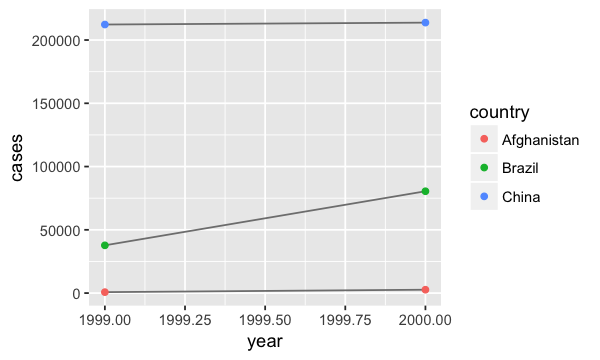

In [5]:
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))

# 12.3 Spreading and gathering

## 12.3.1 Gathering

In [6]:
table4a

country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [7]:
table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [8]:
tidy4a <- table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")
tidy4b <- table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")
left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


## 12.3.2 Spreading

In [9]:
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


In [10]:
spread(table2, key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# 12.4 Separating and uniting

## 12.4.1 Separate

In [11]:
table3

country,year,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [12]:
table3 %>% 
  separate(rate, into = c("cases", "population"), convert = TRUE)
    # By default, separate() will split values wherever it sees a non-alphanumeric character
    # convert=TRUE makes values integer

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [13]:
table3 %>% 
  separate(year, into = c("century", "year"), sep = 2)

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


## 12.4.2 Unite

In [14]:
table5

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [15]:
table5 %>% 
  unite(new, century, year, sep="") 

country,new,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# 12.5 Missing values

implicit / explicit

In [16]:
stocks <- tibble(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  return = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
)

In [17]:
stocks

year,qtr,return
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [18]:
stocks %>% 
  complete(year, qtr)

year,qtr,return
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [19]:
treatment <- tribble(
  ~ person,           ~ treatment, ~response,
  "Derrick Whitmore", 1,           7,
  NA,                 2,           10, 
  NA,                 3,           9,
  "Katherine Burke",  1,           4
)

In [20]:
treatment # missing values indicate that the previous value should be carried forward

person,treatment,response
Derrick Whitmore,1,7
NA,2,10
NA,3,9
Katherine Burke,1,4


In [21]:
treatment %>% 
  fill(person)

person,treatment,response
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4
